## Import Tool Kit

In [47]:
# import the necessary libraries you need for your analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

# warnings supression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
# read in csv file and display first 5 rows of datset
df = pd.read_excel("data/MuesliProject_raw_data.xlsx")

In [49]:
# read in csv file and display first 5 rows of datset
df_campaign = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='Campaign Data')
df_process = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='Order Process Data')
df_intern = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='InternData Study')

## Data Cleaning

#### Column Cleaning and dropping duplicates

In [50]:
#column cleaning
headers = df.iloc[0]
df.rename(columns=headers, inplace=True)
df.drop(df.index[0], inplace=True)

#drop the new index column
df = df.reset_index(col_level=0)
df.drop('index',axis=1,inplace=True)

In [51]:
#change the column description - underscore instead of space and all str lower
cols = df.columns.tolist()
df.columns = [col.replace(' ','_').lower()for col in cols]

cols = df_campaign.columns.tolist()
df_campaign.columns = [col.replace(' ','_').lower()for col in cols]

cols = df_process.columns.tolist()
df_process.columns = [col.replace(' ','_').lower()for col in cols]

cols = df_intern.columns.tolist()
df_intern.columns = [col.replace(' ','_').lower()for col in cols]


In [52]:
#drop the duplicates from these tables
df_campaign.drop_duplicates(subset='order_id', keep='first' ,inplace=True, ignore_index=False)
df_process.drop_duplicates(subset='order_id', keep='first' ,inplace=True, ignore_index=False)
df_intern.drop_duplicates(subset='order_id', keep='first' ,inplace=True, ignore_index=False)
df.drop_duplicates(subset='order_id', keep='first' ,inplace=True, ignore_index=False)

In [53]:
#merge all tables
df_arrival= df.merge(df_campaign, how='left' , on='order_id').merge(df_process,how='inner', on='order_id').merge(df_intern,how='left', on='order_id')

df_arrival.head()

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country/region,city,state,...,discount,profit,arrival_scan_date,customer_name_y,row_id,order_date_y,on_truck_scan_date,ship_mode_y,ready_to_ship_date,pickup_date
0,27.0,CA-2019-121755,2019-01-16 00:00:00,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,0.0,11.7741,NaT,NaN,26.0,2019-01-16,2019-01-23,Standard Processing,NaT,NaT
1,45.0,CA-2019-118255,2019-03-11 00:00:00,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,0.0,19.7714,NaT,NaN,45.0,2019-03-11,2019-03-13,Express,NaT,NaT
2,48.0,CA-2019-169194,2019-06-20 00:00:00,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,0.0,4.95,NaT,NaN,48.0,2019-06-20,2019-06-26,Standard Processing,NaT,NaT
3,60.0,CA-2019-111682,2019-06-17 00:00:00,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,0.0,3.3,NaT,NaN,56.0,2019-06-17,2019-06-19,Express,NaT,NaT
4,87.0,CA-2020-155558,2020-10-26 00:00:00,Standard Class,PG-18895,Paul Gonzalez,Email,United States,Rochester,Minnesota,...,0.0,6.7966,NaT,NaN,87.0,2020-10-26,2020-11-04,Standard Processing,NaT,NaT


In [54]:
#only take the column that are needed
df_arrival_final = df_arrival[["order_id", "order_date_x", "ready_to_ship_date", "pickup_date", "on_truck_scan_date", "arrival_scan_date", "ship_mode_y", "ship_mode_x"]]

#### Order Process Table

In [55]:
#the final order process table - take only columns needed from the df_arrival_final
df_order_process_final = df_arrival_final[["order_id", "order_date_x", "on_truck_scan_date" ,"ship_mode_y", "ship_mode_x"]]
df_order_process_final.head()

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x
0,CA-2019-121755,2019-01-16 00:00:00,2019-01-23,Standard Processing,Second Class
1,CA-2019-118255,2019-03-11 00:00:00,2019-03-13,Express,First Class
2,CA-2019-169194,2019-06-20 00:00:00,2019-06-26,Standard Processing,Standard Class
3,CA-2019-111682,2019-06-17 00:00:00,2019-06-19,Express,First Class
4,CA-2020-155558,2020-10-26 00:00:00,2020-11-04,Standard Processing,Standard Class


#### Campaign Table

In [56]:
#the final campaign table
df_campaign_final = df_order_process_final.merge(df_campaign, how='inner' , on='order_id')

In [57]:
#to cut out the weekend and only have weekdays
df_campaign_final["total_delivery_days"]=np.busday_count(df_campaign_final ['order_date_x'].values.astype('datetime64[D]'), df_campaign_final ['arrival_scan_date'].values.astype('datetime64[D]'), weekmask='Mon Tue Wed Thu Fri')

In [58]:
df_campaign_final['total_delivery_days_w_weekend'] = (df_campaign_final['arrival_scan_date'] - df_campaign_final['order_date_x']).dt.days 

/opt/anaconda3/envs/muelsi/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


In [59]:
df_campaign_final["week_day_arrival"] =df_campaign_final["arrival_scan_date"].dt.day_name()

In [60]:
df_campaign_final['order_date_x'] = pd.to_datetime(df_campaign_final['order_date_x'])
df_campaign_final["week_day_arrival"] =df_campaign_final["arrival_scan_date"].dt.day_name()
df_campaign_final["week_day_order"] =df_campaign_final["order_date_x"].dt.day_name()


In [61]:
df_campaign_final['how_many_weekends'] = ((df_campaign_final['total_delivery_days_w_weekend'] - df_campaign_final['total_delivery_days'])/2)
df_campaign_final['how_many_weekends'] = df_campaign_final['how_many_weekends'].astype('int64')

In [62]:
df_campaign_final.head()

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x,arrival_scan_date,customer_name,total_delivery_days,total_delivery_days_w_weekend,week_day_arrival,week_day_order,how_many_weekends
0,CA-2019-145625,2019-09-11,2019-09-18,Standard Processing,Standard Class,2019-09-23,Kelly Collister,8,12,Monday,Wednesday,2
1,CA-2019-162138,2019-04-23,2019-05-01,Standard Processing,Standard Class,2019-05-06,Grace Kelly,9,13,Monday,Tuesday,2
2,CA-2019-169166,2019-05-09,2019-05-15,Standard Processing,Standard Class,2019-05-20,Sonia Sunley,7,11,Monday,Thursday,2
3,CA-2020-131954,2020-01-21,2020-01-29,Standard Processing,Standard Class,2020-02-03,Darrin Sayre,9,13,Monday,Tuesday,2
4,CA-2019-102981,2019-09-06,2019-09-11,Standard Processing,Second Class,2019-09-16,Mary O'Rourke,6,10,Monday,Friday,2


#### Intern Table

In [63]:
#the final intern table
df_intern_final = df_order_process_final.merge(df_intern, how='inner' , on='order_id')

In [64]:
#to cut out the weekend and only have weekdays
df_intern_final["work_days_to_process"]=np.busday_count(df_intern_final ['order_date_x'].values.astype('datetime64[D]'), df_intern_final ['ready_to_ship_date'].values.astype('datetime64[D]'), weekmask='Mon Tue Wed Thu Fri')

In [65]:
#to cut out the weekend and only have weekdays
df_intern_final["work_days_to_truck"]=np.busday_count(df_intern_final ['order_date_x'].values.astype('datetime64[D]'), df_intern_final ['on_truck_scan_date'].values.astype('datetime64[D]'), weekmask='Mon Tue Wed Thu Fri')

In [66]:
df_intern_final['waiting_for_truck'] = df_intern_final['work_days_to_truck'] - df_intern_final['work_days_to_process']

In [67]:
df_intern_final = df_intern_final[["order_id","order_date_x","on_truck_scan_date","ship_mode_y","ship_mode_x","ready_to_ship_date","pickup_date","work_days_to_process","waiting_for_truck","work_days_to_truck"]]

In [68]:
df_intern_final.head()

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x,ready_to_ship_date,pickup_date,work_days_to_process,waiting_for_truck,work_days_to_truck
0,CA-2020-119004,2020-11-23 00:00:00,2020-12-02,Standard Processing,Standard Class,2020-11-30,2020-12-02,5,2,7
1,CA-2019-145625,2019-09-11 00:00:00,2019-09-18,Standard Processing,Standard Class,2019-09-17,2019-09-18,4,1,5
2,CA-2020-135307,2020-11-26 00:00:00,2020-11-27,Express,First Class,2020-11-27,2020-11-27,1,0,1
3,CA-2019-102981,2019-09-06 00:00:00,2019-09-11,Standard Processing,Second Class,2019-09-09,2019-09-11,1,2,3
4,US-2020-155425,2020-11-10 00:00:00,2020-11-12,Express,First Class,2020-11-11,2020-11-12,1,1,2


#### Exploratory Data Analysis

In [69]:
crosstb = pd.crosstab(index=df_intern_final["ship_mode_y"],columns=df_intern_final["work_days_to_process"], normalize="index")\
    .round(4)*100

crosstb

work_days_to_process,0,1,2,3,4,5
ship_mode_y,,,,,,
Express,33.96,15.09,28.30,22.64,0.00,0.00
Standard Processing,2.65,2.65,19.87,29.80,31.79,13.25


In [70]:
df_intern_final

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x,ready_to_ship_date,pickup_date,work_days_to_process,waiting_for_truck,work_days_to_truck
0,CA-2020-119004,2020-11-23 00:00:00,2020-12-02,Standard Processing,Standard Class,2020-11-30,2020-12-02,5,2,7
1,CA-2019-145625,2019-09-11 00:00:00,2019-09-18,Standard Processing,Standard Class,2019-09-17,2019-09-18,4,1,5
2,CA-2020-135307,2020-11-26 00:00:00,2020-11-27,Express,First Class,2020-11-27,2020-11-27,1,0,1
3,CA-2019-102981,2019-09-06 00:00:00,2019-09-11,Standard Processing,Second Class,2019-09-09,2019-09-11,1,2,3
4,US-2020-155425,2020-11-10 00:00:00,2020-11-12,Express,First Class,2020-11-11,2020-11-12,1,1,2
...,...,...,...,...,...,...,...,...,...,...
199,CA-2020-152142,2020-11-14 00:00:00,2020-11-18,Standard Processing,Standard Class,2020-11-16,2020-11-18,0,2,2
200,US-2019-134488,2019-09-24 00:00:00,2019-10-02,Standard Processing,Standard Class,2019-10-01,2019-10-02,5,1,6
201,CA-2020-103499,2020-11-20 00:00:00,2020-11-25,Standard Processing,Standard Class,2020-11-24,2020-11-25,2,1,3
202,US-2020-165456,2020-11-30 00:00:00,2020-12-04,Express,First Class,2020-12-03,2020-12-04,3,1,4


In [71]:

df_intern_final

df_intern_final_work = df_intern_final.groupby("work_days_to_process", as_index=False)["order_id"].count()\
    .rename(columns={"order_id":"total"}) 

df_intern_final_work

,work_days_to_process,total
0,0,22
1,1,12
2,2,45
3,3,57
4,4,48
5,5,20


In [73]:
sales_profit = df[["order_id","order_date","ship_mode","sales","profit","origin_channel"]]

In [74]:
sales_profit["order_date"] = pd.to_datetime(sales_profit["order_date"])

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_33144/3180480143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_profit["order_date"] = pd.to_datetime(sales_profit["order_date"])


In [75]:
sales_profit["year"] = sales_profit["order_date"].dt.year
sales_profit["month"] = sales_profit["order_date"].dt.month_name()

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_33144/13479399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_profit["year"] = sales_profit["order_date"].dt.year
/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_33144/13479399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_profit["month"] = sales_profit["order_date"].dt.month_name()


In [76]:
sales_profit["sales"] = sales_profit["sales"].astype('float')
sales_profit["profit"] = sales_profit["profit"].astype('float')

sales_profit["sales"] = sales_profit["sales"].round(2)
sales_profit["profit"] = sales_profit["profit"].round(2)


/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_33144/3549151388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_profit["sales"] = sales_profit["sales"].astype('float')
/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_33144/3549151388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_profit["profit"] = sales_profit["profit"].astype('float')
/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_33144/3549151388.py:4: SettingWithCopyWarning: 
A value is trying to be

In [77]:

sales_profit

,order_id,order_date,ship_mode,sales,profit,origin_channel,year,month
0,CA-2019-121755,2019-01-16,Second Class,90.57,11.77,Email,2019,January
1,CA-2019-118255,2019-03-11,First Class,45.98,19.77,Sales,2019,March
2,CA-2019-169194,2019-06-20,Standard Class,45.00,4.95,Email,2019,June
3,CA-2019-111682,2019-06-17,First Class,30.00,3.30,Email,2019,June
4,CA-2018-135545,2018-11-24,Standard Class,13.98,6.15,Email,2018,November
...,...,...,...,...,...,...,...,...
9979,CA-2019-146913,2019-10-31,Standard Class,1403.92,70.20,Sales,2019,October
9980,US-2017-114377,2017-11-05,First Class,149.90,40.47,Email,2017,November
9984,CA-2020-107209,2020-07-27,Second Class,194.85,12.18,Email,2020,July
9986,US-2020-152842,2020-07-16,Standard Class,242.35,15.15,Email,2020,July


In [78]:
sales_profit_1 = sales_profit.groupby(["month","year"], as_index=False)["sales","profit"].sum() 

In [79]:
month = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']
sales_profit_1["month"] = pd.CategoricalIndex(sales_profit_1["month"], categories=month,ordered=True )

In [80]:
sales_profit_1 = sales_profit_1.sort_values("month")


In [ ]:
sales_profit_2 = sales_profit.groupby(["year"], as_index=False)["sales","profit"].sum() 

In [81]:
sales_profit_1

,month,year,sales,profit
19,January,2020,22350.07,2354.73
18,January,2019,6617.20,1166.02
17,January,2018,12827.52,-1905.44
16,January,2017,4582.39,967.09
15,February,2020,9943.98,1624.68
14,February,2019,16712.93,4125.28
13,February,2018,6873.99,2202.27
12,February,2017,1935.65,539.92
28,March,2017,13934.91,1224.35
31,March,2020,24755.30,5262.41


In [ ]:
sales_profit_2

,year,sales,profit
0,2017,222808.82,27151.53
1,2018,221122.99,38041.66
2,2019,311123.15,62836.59
3,2020,353710.97,43042.66


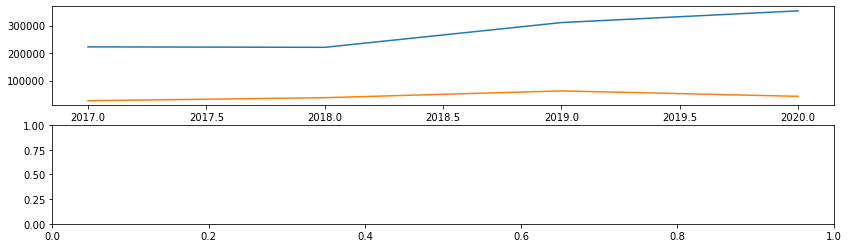

In [ ]:

fig, ax = plt.subplots(2, figsize=(14,4)) # is equivalent to (2,1)

# Call plot() method on the appropriate object
ax[0].plot(sales_profit_2['year'], sales_profit_2['sales'])
ax[0].plot(sales_profit_2['year'], sales_profit_2['profit'])

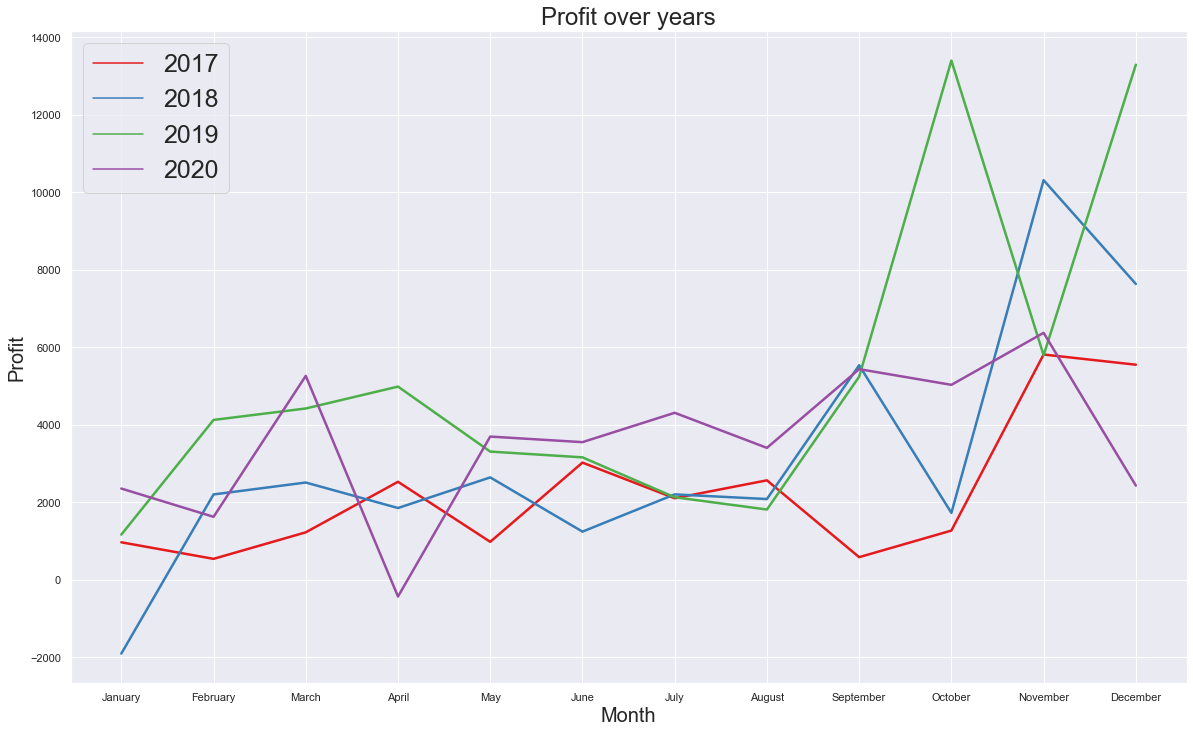

In [ ]:
plt.figure(figsize=(20,12))


sns.lineplot(x='month',y='profit',data=sales_profit_1,hue='year',linewidth=2.5,palette='Set1'
)
plt.legend(fontsize=25)
plt.xlabel('Month', size=20)
plt.ylabel('Profit', size=20);
plt.title("Profit over years", size=24)
sns.set(font_scale = 0.9)


#### Descriptive statistics

In [ ]:
process_days = df_intern_final[["order_id","work_days_to_process","waiting_for_truck","work_days_to_truck"]]

In [82]:
process_days.describe()

,work_days_to_process,waiting_for_truck,work_days_to_truck
count,204.000000,204.000000,204.000000
mean,2.769608,1.357843,4.127451
std,1.417991,0.821141,1.839209
min,0.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000
50%,3.000000,1.000000,5.000000
75%,4.000000,2.000000,5.000000
max,5.000000,3.000000,7.000000


In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,10))
ax1.set_title('Basic Plot')
ax1.boxplot(data)